In [ ]:
# cats_and_dogs classification model with CNN
# train : 2000 images [cat(1000) + dog(1000)]  , size는 다름
# validation : 1000 images [cat(500) + dog(500)] , size는 다름

In [1]:
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

import warnings
warnings.filterwarnings(action='ignore')

print(tf.__version__)

2.17.0


In [ ]:
# Colab용 : Linux/GPU사용
# !wget --no-check-certificate \
#   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#   -O /tmp/cats_and_dogs_filtered.zip

In [2]:
# cats_and_dogs 데이터셋 다운로드 , Windows용
_TRAIN_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
urllib.request.urlretrieve(_TRAIN_URL, '/tmp/cats_and_dogs_filtered.zip')

('/tmp/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x7bddf7e1d420>)

In [3]:
# 압축해제
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
# 이미지 데이터 경로 설정
import os

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.219.jpg', 'cat.391.jpg', 'cat.684.jpg', 'cat.546.jpg', 'cat.970.jpg', 'cat.449.jpg', 'cat.250.jpg', 'cat.961.jpg', 'cat.401.jpg', 'cat.229.jpg']
['dog.797.jpg', 'dog.104.jpg', 'dog.351.jpg', 'dog.697.jpg', 'dog.264.jpg', 'dog.829.jpg', 'dog.219.jpg', 'dog.246.jpg', 'dog.964.jpg', 'dog.850.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


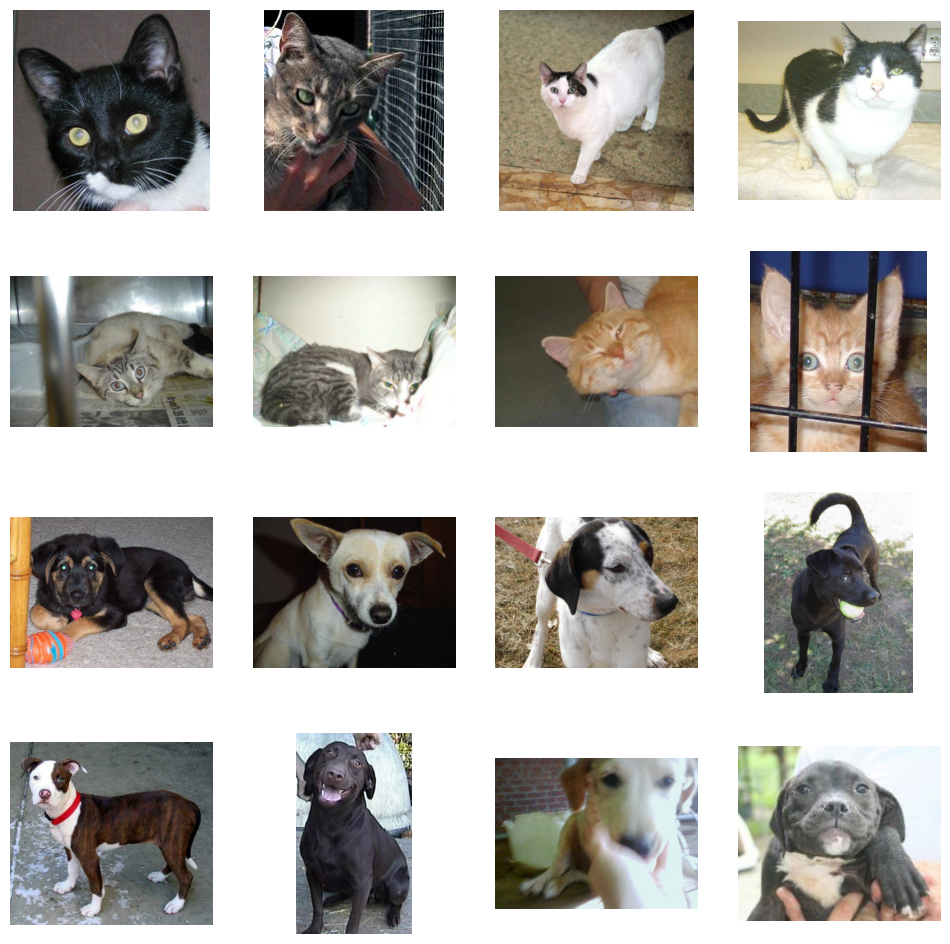

In [5]:
# 데이터 시각화
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images ,시작 인덱스

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

### CNN Model 구현

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

### 데이터 전처리 : 이미지 증강(Image Augmentation)

In [7]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 학습

In [9]:
# 약 2분 소요(colab)
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              # validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 4s - 41ms/step - accuracy: 0.6405 - loss: 0.6351 - val_accuracy: 0.5590 - val_loss: 0.7421
Epoch 2/15
100/100 - 1s - 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5590 - val_loss: 0.7421
Epoch 3/15
100/100 - 4s - 40ms/step - accuracy: 0.6895 - loss: 0.5836 - val_accuracy: 0.6900 - val_loss: 0.5815
Epoch 4/15
100/100 - 1s - 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6900 - val_loss: 0.5815
Epoch 5/15
100/100 - 4s - 40ms/step - accuracy: 0.7385 - loss: 0.5402 - val_accuracy: 0.7080 - val_loss: 0.5880
Epoch 6/15
100/100 - 1s - 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7080 - val_loss: 0.5880
Epoch 7/15
100/100 - 4s - 40ms/step - accuracy: 0.7705 - loss: 0.4757 - val_accuracy: 0.7230 - val_loss: 0.5761
Epoch 8/15
100/100 - 1s - 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7230 - val_loss: 0.5761
Epoch 9/15
100/100 - 4s - 40ms/step - accuracy: 0.8150 - loss: 0.4119 - 

### 학습 결과 시각화

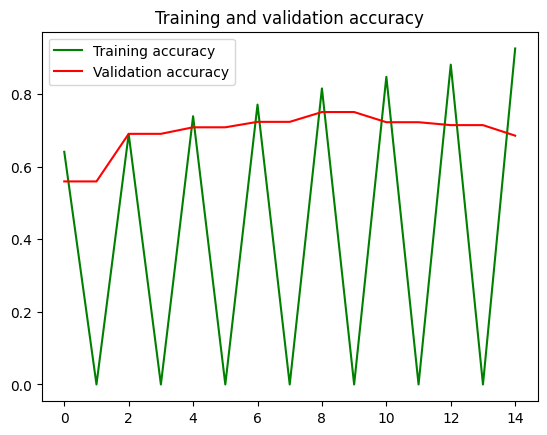

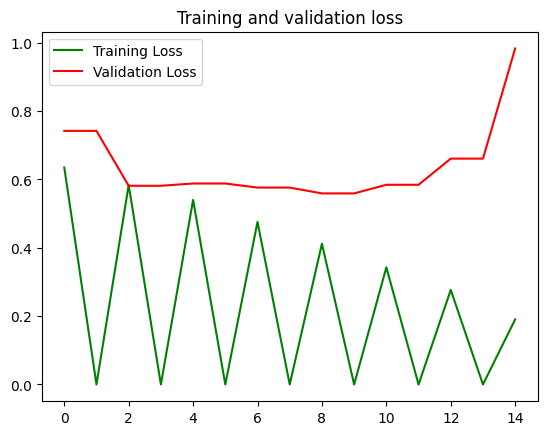

In [10]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 이미지 분류 예측

In [11]:
# import numpy as np
# from tensorflow.keras.preprocessing import image
# def image_predict(file_name):
#     path = 'cats_and_dogs예측용이미지/' + file_name
#     img = image.load_img(path, target_size=(150, 150))
#     x = image.img_to_array(img)   # 2차원 ndarray로 변환
#     x = np.expand_dims(x, axis=0) # 3차원으로 변환
#     images = np.vstack([x])       # 4차원으로 변환
#     classes = model.predict(images, batch_size=10)
#     # print(classes[0],end=' ')
#     if classes[0] == 1.0:
#         print(file_name ,': dog')
#     else:
#         print(file_name ,': cat')

# image_predict('cat_01.jpg')
# image_predict('cat_02.jpg')
# image_predict('cat_03.jpg')
# image_predict('cat_04.jpg')
# image_predict('cat_05.jpg')

# image_predict('dog_01.jpg')
# image_predict('dog_02.jpg')
# image_predict('dog_03.jpg')
# image_predict('dog_04.jpg')
# image_predict('dog_05.jpg')

# image_predict('cat_dog_01.jpg')
# image_predict('cat_dog_02.jpg')
# image_predict('cat_dog_03.jpg')
# image_predict('cat_dog_04.jpg')
# image_predict('cat_dog_05.jpg')

### 모델 개선  : 정확도 향상

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Colab pro: 약 15분 소요
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      #validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 16s - 157ms/step - accuracy: 0.5015 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6964
Epoch 2/100
100/100 - 1s - 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6964
Epoch 3/100
100/100 - 13s - 128ms/step - accuracy: 0.5225 - loss: 0.6931 - val_accuracy: 0.5830 - val_loss: 0.6852
Epoch 4/100
100/100 - 1s - 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5830 - val_loss: 0.6852
Epoch 5/100
100/100 - 13s - 129ms/step - accuracy: 0.5450 - loss: 0.6883 - val_accuracy: 0.5710 - val_loss: 0.6775
Epoch 6/100
100/100 - 1s - 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5710 - val_loss: 0.6775
Epoch 7/100
100/100 - 13s - 128ms/step - accuracy: 0.5590 - loss: 0.6817 - val_accuracy: 0.5470 - val_loss: 0.6736
Epoch 8/100
100/100 - 1s - 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy

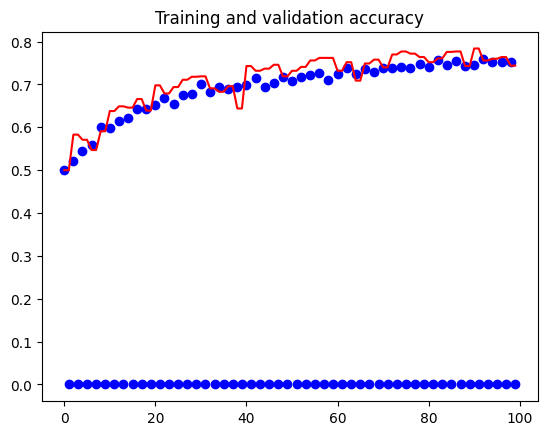

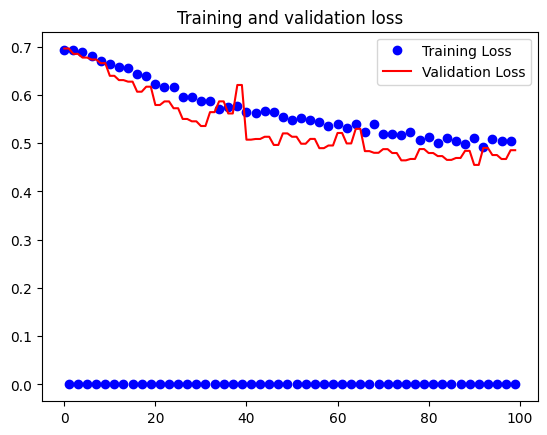

In [14]:
# 시각화
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# 결과 : 과적합이 해소 되고 validation의 정확도가 약간 향상됨
# 기타 : 이미지의 shape을 (300,300,3)로 할 경우 정확도 감소됨